# Forecast Electric power consumption - Results and Conclosion
## Table of Content
<ul>
    <li><a href="#res">Results</a></li>
    <li><a href="#con">Conclusion</a></li>
</ul>

In [4]:
import pandas as pd
import math
import numpy as np

# ---------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
plt.rcParams['figure.figsize']=(17,5)

# ---------------------------------------
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

# ---------------------------------------
from prophet import Prophet
import holidays
from sklearn.metrics import mean_squared_error, mean_absolute_error

#----------------------------------------
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [5]:

def bar_plot2(df, title) :
    ax = df.plot(
        kind='bar',
        title=title,
        legend=True,
        xlabel="Phases",
        ylabel="Percentage Accuracy",
        rot=0,
        figsize=(10, 4),
        edgecolor='black'
    )

    # Add lines for the maximum and minimum values
    max_value = df.max().max()
    min_value = df.min().min()

    plt.axhline(y=max_value, color='red', linestyle='--', linewidth=1, label=f'Max Value ({max_value})')
    plt.axhline(y=min_value, color='blue', linestyle='--', linewidth=1, label=f'Min Value ({min_value})')

    # Display the legend
    plt.legend()

    # Show the plot
    plt.show()

<a id='res'></a>
## Results

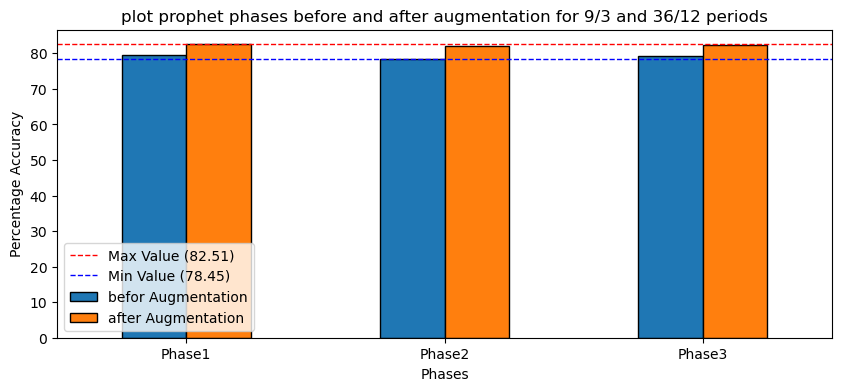

In [6]:
prophet_period1 = pd.DataFrame({
    'Phases': ['Phase1', 'Phase2', 'Phase3'],
    'befor Augmentation': [79.40, 78.45, 79.25],
    'after Augmentation': [82.51, 82.00, 82.28],
})

prophet_period1.set_index('Phases', inplace=True)
bar_plot2(prophet_period1, 'plot prophet phases before and after augmentation for 9/3 and 36/12 periods')

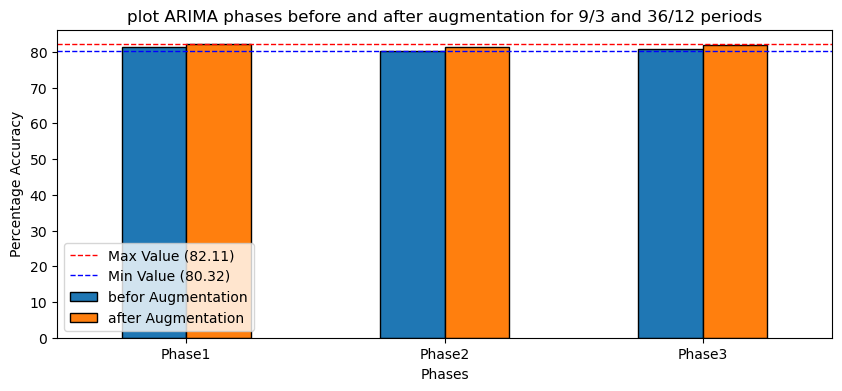

In [8]:
arima_period1 = pd.DataFrame({
    'Phases': ['Phase1', 'Phase2', 'Phase3'],
    'befor Augmentation': [81.35, 80.32, 80.74],
    'after Augmentation': [82.11, 81.41, 82.01],
})

arima_period1.set_index('Phases', inplace=True)
bar_plot2(arima_period1, 'plot ARIMA phases before and after augmentation for 9/3 and 36/12 periods')

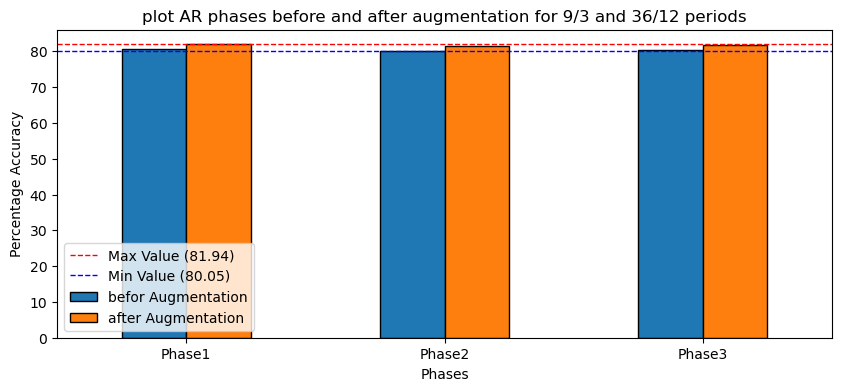

In [9]:
ar_period1 = pd.DataFrame({
    'Phases': ['Phase1', 'Phase2', 'Phase3'],
    'befor Augmentation': [80.54, 80.05, 80.37],
    'after Augmentation': [81.94, 81.41, 81.75],
})

ar_period1.set_index('Phases', inplace=True)
bar_plot2(ar_period1, 'plot AR phases before and after augmentation for 9/3 and 36/12 periods')

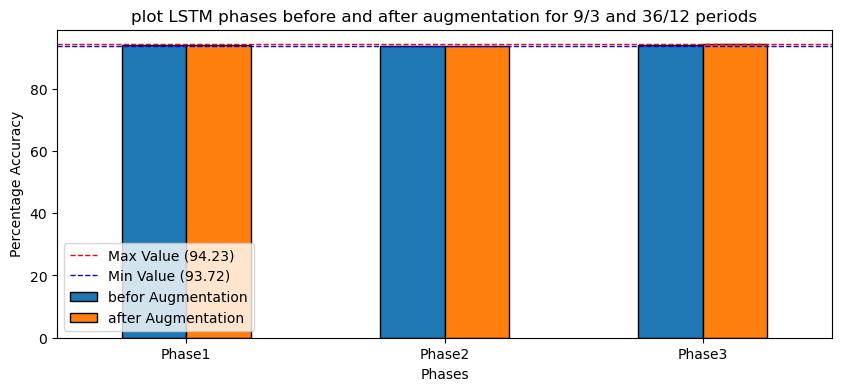

In [10]:
lstm_period1 = pd.DataFrame({
    'Phases': ['Phase1', 'Phase2', 'Phase3'],
    'befor Augmentation': [94.05, 93.85, 94.15],
    'after Augmentation': [94.04, 93.72, 94.23],
})

lstm_period1.set_index('Phases', inplace=True)
bar_plot2(lstm_period1, 'plot LSTM phases before and after augmentation for 9/3 and 36/12 periods')

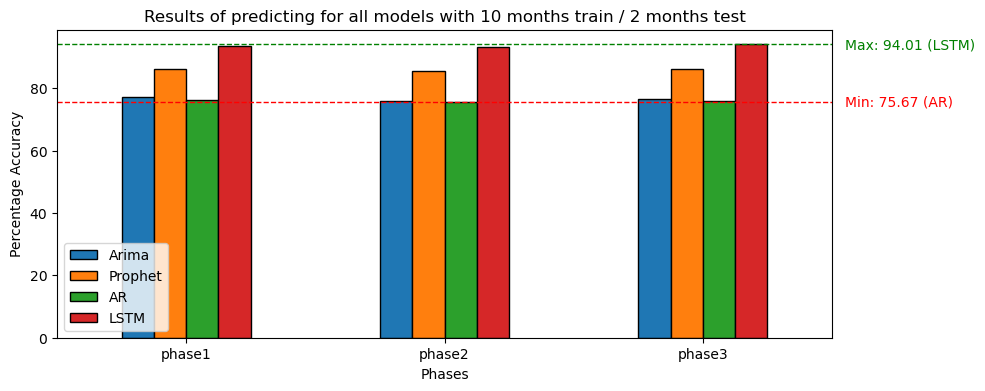

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
df = pd.DataFrame({
    'Phase': ['phase1', 'phase2', 'phase3'],
    'Arima': [77.00, 76.01, 76.37],
    'Prophet': [86.03, 85.55, 85.98],
    'AR': [76.28, 75.67, 76.02],
    'LSTM': [93.46, 93.13, 94.01]
})
df.set_index('Phase', inplace=True)

# Plotting the bar chart
ax = df.plot(
    kind='bar',
    title='Results of predicting for all models with 10 months train / 2 months test',
    legend=True,
    xlabel="Phases",
    ylabel="Percentage Accuracy",
    rot=0,
    figsize=(10, 4),
    edgecolor='black'
)

# Calculate the global max and min values
global_max = df.max().max()
global_min = df.min().min()

# Find the column names for the global max and min values
max_col = df.max().idxmax()
min_col = df.min().idxmin()

# Plotting the global maximum value line
ax.axhline(y=global_max, color='green', linestyle='--', linewidth=1)
ax.text(len(df.index) -0.45 , global_max, f'Max: {global_max} ({max_col})', color='green', ha='left', va='center')

# Plotting the global minimum value line
ax.axhline(y=global_min, color='red', linestyle='--', linewidth=1)
ax.text(len(df.index) -0.45, global_min, f'Min: {global_min} ({min_col})', color='red', ha='left', va='center')

plt.show()

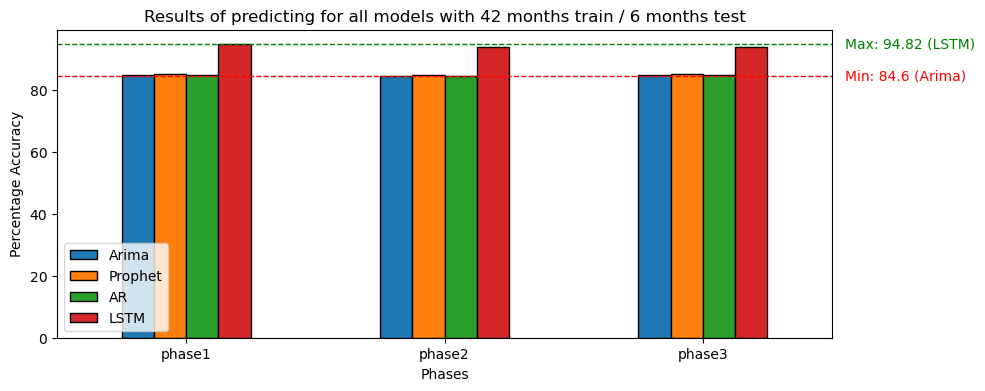

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
df = pd.DataFrame({
    'Phase': ['phase1', 'phase2', 'phase3'],
    'Arima': [84.99, 84.60, 84.88],
    'Prophet': [85.38, 85.00, 85.26],
    'AR': [84.99, 84.61, 84.89],
    'LSTM': [94.82, 93.84, 94.03]
})
df.set_index('Phase', inplace=True)

# Plotting the bar chart
ax = df.plot(
    kind='bar',
    title='Results of predicting for all models with 42 months train / 6 months test',
    legend=True,
    xlabel="Phases",
    ylabel="Percentage Accuracy",
    rot=0,
    figsize=(10, 4),
    edgecolor='black'
)

# Calculate the global max and min values
global_max = df.max().max()
global_min = df.min().min()

# Find the column names for the global max and min values
max_col = df.max().idxmax()
min_col = df.min().idxmin()

# Plotting the global maximum value line
ax.axhline(y=global_max, color='green', linestyle='--', linewidth=1)
ax.text(len(df.index) -0.45 , global_max, f'Max: {global_max} ({max_col})', color='green', ha='left', va='center')

# Plotting the global minimum value line
ax.axhline(y=global_min, color='red', linestyle='--', linewidth=1)
ax.text(len(df.index) -0.45, global_min, f'Min: {global_min} ({min_col})', color='red', ha='left', va='center')

plt.show()

<a id='con'></a>
# Conclusion

- The LSTM model consistently outperformed all other models across all periods.
- The range of results for LSTM did not change significantly before and after data augmentation; the same was observed for ARIMA and AR models.
- The Prophet model's accuracy improved with the augmented data.
- This indicates that increasing the training and testing period impacts accuracy, as seen with the Prophet model.
- **Conclusion:** The LSTM model is the best choice for development at Tubas Electrical Company.